# Analysis of Fandango's rating system
- analyze recent movie ratings data
- determine if there is any change to Fandango's rating system after Hickey's analysis

In [43]:
import pandas as pd
pd.options.display.max_columns = 100

cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
        'Fandango_Difference']
fandango_score = pd.read_csv("fandango_score_comparison.csv", usecols = cols)
fandango_score.head(3)

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5

In [44]:
col = ['movie', 'year', 'fandango']
movie_rating = pd.read_csv("movie_ratings_16_17.csv", usecols = col)
movie_rating.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

In [45]:
"""
Separate data into movies released before Hickey's analysis (2015) and after (2016)
"""
fandango_score['Year'] = fandango_score['FILM'].str[-5:-1]
movie2015 = fandango_score[fandango_score['Year'] == '2015'].copy()
movie2016 = movie_rating[movie_rating['year'] == 2016].copy()
print(movie2015['Year'].value_counts())
movie2016['year'].value_counts()

2015    129
Name: Year, dtype: int64


2016    191
Name: year, dtype: int64

In [58]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
movie2015['Fandango_Ratingvalue'].plot(kind = 'kde')
movie2016['fandango'].plot(kind = 'kde', xticks = ticks)
plt.xlabel('Movie Ratings')
plt.legend(['movie2015','movie2016'], loc = 'lower left')


In [65]:
freq2015=movie2015['Fandango_Ratingvalue'].value_counts(normalize = True)*100
freq2016=movie2016['fandango'].value_counts(normalize = True)*100
print(freq2015, freq2016)

4.1    10.077519
3.9     9.302326
4.2     8.527132
4.3     6.976744
4.5     6.976744
3.6     6.201550
3.7     6.201550
4.4     5.426357
3.4     5.426357
4.0     5.426357
3.5     4.651163
3.2     3.100775
2.9     3.100775
3.3     3.100775
3.8     3.100775
3.0     3.100775
3.1     2.325581
4.8     2.325581
2.8     1.550388
4.6     1.550388
2.7     1.550388
Name: Fandango_Ratingvalue, dtype: float64 4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64


In [68]:
stats_2015 = movie2015['Fandango_Ratingvalue'].describe()
stats_2016 = movie2016['fandango'].describe()
print(stats_2015, stats_2016)

count    129.000000
mean       3.846512
std        0.505446
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64 count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



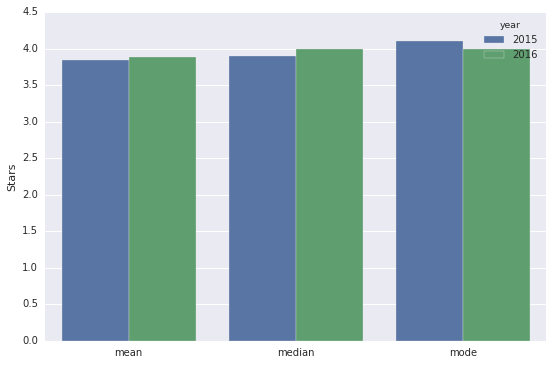

In [97]:
import seaborn as sns
mean2015, median2015, mode2015 = (movie2015['Fandango_Ratingvalue'].mean(),
                                  movie2015['Fandango_Ratingvalue'].median(),
                                  movie2015['Fandango_Ratingvalue'].mode())
mean2016, median2016, mode2016 = (movie2016['fandango'].mean(),
                                  movie2016['fandango'].median(),
                                  movie2016['fandango'].mode())
data = [('mean',mean2015,'2015'),
        ('median',median2015,'2015'),
        ('mode',mode2015[0],'2015'),
       ('mean',mean2016,'2016'),
        ('median',median2016,'2016'),
        ('mode',mode2016[0],'2016')]
stats = pd.DataFrame(data, columns = ['stat','values','year'])
sns.barplot(x='stat', y='values', hue = 'year', data = stats)
plt.xlabel(' '); plt.ylabel('Stars')



# Conclusions:
- There seems to be an improvement to the ratings in 2016, the mode, which is the highest frequency is lower than the previous year 2015; and the mean value has slightly increased. Ratings are more spread out, which is an indication of a better spread, unlike a left-skewed di